## 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

---

## 데이터 불러오기

kaggle Retail-Case-Study-Data<br>
https://www.kaggle.com/datasets/darpan25bajaj/retail-case-study-data/data

In [2]:
# 데이터 불러오기
customer = pd.read_csv("./data/Customer.csv")
transaction = pd.read_csv("./data/Transactions.csv")
product = pd.read_csv("./data/prod_cat_info.csv")

In [3]:
# 고객 데이터 확인
customer.head(3)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0


- customer_id: 고객 코드
- DOB: 고객 생년월일(DD-MM-YYYY)
- Gender: 고객 성별
- city_code: 고객 거주지

In [4]:
# 주문 데이터 확인
transaction.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


- transaction_id: 거래 코드
- cust_id: 고객 코드
- tran_date: 거래 날짜(DD-MM-YYYY)
- prod_subcat_code: 제품 하위 카테고리 코드
- prod_cat_code: 제품 카테고리 코드
- Qty: 제품 수량
- Rate: 제품 단가
- Tax: 거래에 적용된 세금
- total_amt: 총 거래 금액(Qty * Rate + Tax)
- Store_type: 거래가 이루어진 매장 유형

In [5]:
# 상품 데이터 확인
product.head(3)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids


- prod_cat_code: 제품 카테고리 코드
- prod_cat: 제품 카테고리 이름
- prod_sub_cat_code: 제품 하위 카테고리 코드
- prod_subcat: 제품 하위 카테고리 이름

---

## 데이터 전처리

In [6]:
# 고객 데이터 정보 확인
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


Gender와 city_code에서 각 2개의 결측치 발견했으나, 우선 결측치는 추후에 제거가 필요하면 제거하기로 함

In [7]:
# 날짜 타입으로 변환
customer["DOB"] = pd.to_datetime(customer["DOB"], format='%d-%m-%Y')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [8]:
# 2014년 기준 날짜 설정(2014년 거래 데이터)
reference_date = pd.to_datetime('2014-12-31')

# 고객 나이 계산 함수(만 나이)
def calculate_age(dob, today):
    age = reference_date.year - dob.year
    if (reference_date.month, reference_date.day) < (dob.month, dob.day):
        age -= 1
    return age

# 나이 계산 및 컬럼 추가
ages = []
for dob in customer['DOB']:
    ages.append(calculate_age(dob, reference_date))

customer['Age'] = ages

customer.head(3)

,customer_Id,DOB,Gender,city_code,Age
0,268408,1970-01-02,M,4.0,44
1,269696,1970-01-07,F,8.0,44
2,268159,1970-01-08,F,8.0,44


In [9]:
# 주문 데이터 정보 확인
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [10]:
# 날짜 타입으로 변환
transaction["tran_date"] = pd.to_datetime(transaction['tran_date'], format='mixed')
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 1.8+ MB


In [11]:
# 주문 상태 계산 함수
def calculate_status(qty):
    if qty < 0:
        return 0  # 주문 취소
    else:
        return 1  # 주문 완료

# Status 컬럼 추가
transaction['Status'] = transaction['Qty'].apply(calculate_status)

transaction.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Status
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,0


In [12]:
# 주문 코드 count 확인
transaction["transaction_id"].value_counts()

transaction_id
4170892941     4
32263938079    4
426787191      4
91377906980    3
44125492691    3
              ..
88791150012    1
17648795819    1
25673128667    1
14616200775    1
77960931771    1
Name: count, Length: 20878, dtype: int64

- 하나의 주문에 주문 완료 또는 주문 취소가 두 번 이상 발생한 경우
- 이를 이상치로 판단하고 오래된 주문 완료, 주문 취소 하나씩만 남긴 후 제거

In [13]:
# 주문과 주문 취소 데이터 필터링
completed_orders = transaction[transaction['Qty'] > 0].copy()
cancelled_orders = transaction[transaction['Qty'] < 0].copy()

# 가장 오래된 주문
completed_orders['min_tran_date'] = completed_orders.groupby('transaction_id')['tran_date'].transform('min')
completed_orders_unique = completed_orders.loc[completed_orders['tran_date'] == completed_orders['min_tran_date']].copy()
completed_orders_unique = completed_orders_unique.drop_duplicates(subset=['transaction_id', 'min_tran_date'])

# 가장 오래된 주문 취소
cancelled_orders['min_tran_date'] = cancelled_orders.groupby('transaction_id')['tran_date'].transform('min')
cancelled_orders_unique = cancelled_orders.loc[cancelled_orders['tran_date'] == cancelled_orders['min_tran_date']].copy()
cancelled_orders_unique = cancelled_orders_unique.drop_duplicates(subset=['transaction_id', 'min_tran_date'])

# 두 데이터셋 병합
transactions_df = pd.concat([completed_orders_unique, cancelled_orders_unique])
transactions_df.drop(columns='min_tran_date', inplace=True)

# 날짜 순으로 정렬
transactions_df.sort_values(by='tran_date')

# transaction 데이터 수정
transaction = transactions_df.copy()
transaction.reset_index(drop=True, inplace=True)
transaction.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Status
0,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,1
1,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,1
2,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,1


In [14]:
# 주문 코드 count 확인
transaction["transaction_id"].value_counts()

transaction_id
29258453508    2
37524677011    2
22520569987    2
31861003025    2
22956363366    2
              ..
70138399471    1
84707083328    1
67406278815    1
69507872184    1
8868056339     1
Name: count, Length: 20878, dtype: int64

In [15]:
# 주문 확정 컬럼 생성
transaction['Confirmed'] = 1

# 주문 취소가 있는 transaction_id에 대해 Confirmed 컬럼을 0으로 변경
cancelled_transactions = transaction[transaction['Status']==0]['transaction_id'].unique()
transaction.loc[transaction['transaction_id'].isin(cancelled_transactions), 'Confirmed'] = 0

transaction.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Status,Confirmed
0,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,1,0
1,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,1,1
2,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,1,1


In [16]:
# 상품 데이터 정보 확인
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


---

## 데이터 조인

In [17]:
# 1. Transactions와 Customer 데이터 조인
transaction_customer = pd.merge(
    transaction,
    customer,
    left_on='cust_id',
    right_on='customer_Id',
    how='left'
)

# 2. Transactions와 Product 데이터 조인
merged_df = pd.merge(
    transaction_customer,
    product,
    left_on=['prod_cat_code', 'prod_subcat_code'],
    right_on=['prod_cat_code', 'prod_sub_cat_code'],
    how='left'
)

In [18]:
merged_df.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Status,Confirmed,customer_Id,DOB,Gender,city_code,Age,prod_cat,prod_sub_cat_code,prod_subcat
0,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,1,0,270384,1973-05-11,F,8.0,41,Electronics,5,Computers
1,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,1,1,267750,1986-10-13,M,1.0,28,Home and kitchen,12,Tools
2,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,1,1,275023,1971-03-09,M,6.0,43,Books,6,DIY


In [19]:
# 주문 확정 테이블
confirmed_df = merged_df[merged_df['Confirmed'] == 1].reset_index(drop=True)
confirmed_df.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,Status,Confirmed,customer_Id,DOB,Gender,city_code,Age,prod_cat,prod_sub_cat_code,prod_subcat
0,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,1,1,267750,1986-10-13,M,1.0,28,Home and kitchen,12,Tools
1,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,1,1,275023,1971-03-09,M,6.0,43,Books,6,DIY
2,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,1,1,269345,1970-06-26,F,10.0,44,Books,3,Comics


---

## 탐색적 데이터 분석(EDA)

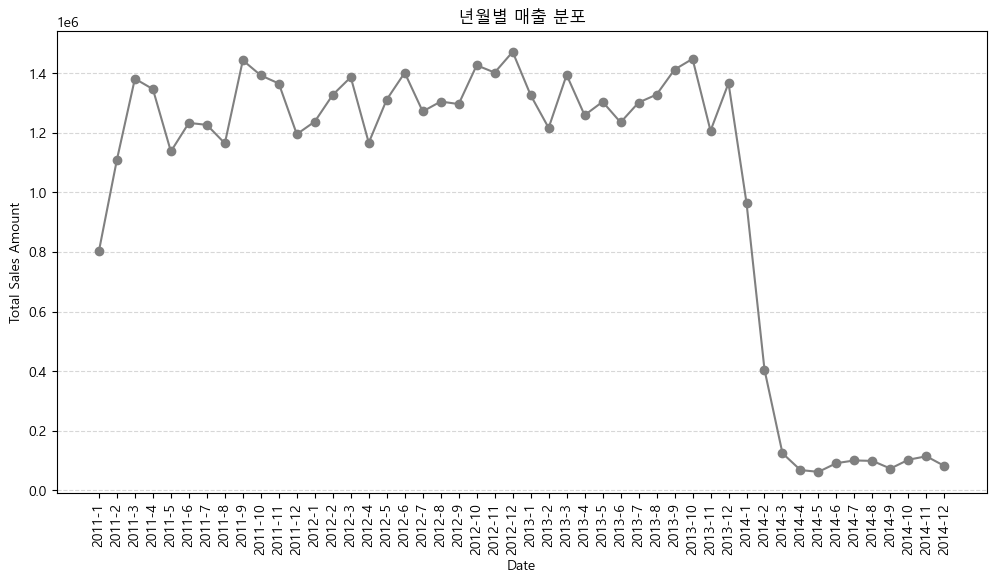

In [20]:
# 1. 년월별 매출 분포
confirmed_df['Year'] = confirmed_df['tran_date'].dt.year
confirmed_df['Month'] = confirmed_df['tran_date'].dt.month

# 매출 그룹화
monthly_sales = confirmed_df.groupby(['Year', 'Month'])['total_amt'].sum().reset_index()

# 분포 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['total_amt'], marker='o', color='gray')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.title('년월별 매출 분포')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('./savefig/년월별_매출분포.png')

- 데이터 기간 : 2011.01.02.~2014.12.02.
- 2014년 1월부터 주문이 불규칙하게 발생함
- 이슈 파악 후 개선이 필요함

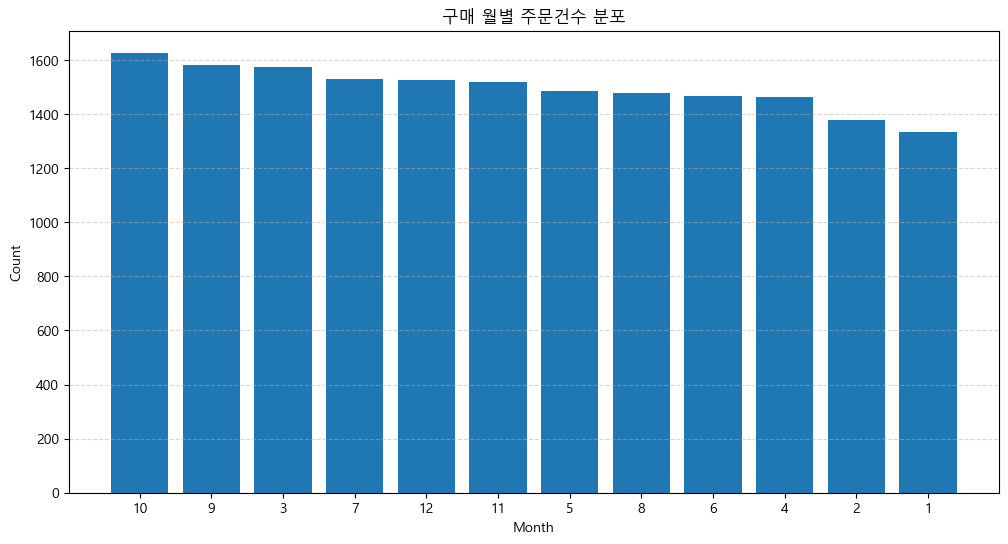

In [21]:
# 2. 구매 월별 주문건수 분포

# 2013년까지만 데이터 필터링
confirmed_df_2013 = confirmed_df[confirmed_df['tran_date'].dt.year <= 2013]
monthly_counts = confirmed_df_2013['tran_date'].dt.month.value_counts()

plt.figure(figsize=(12, 6))
plt.bar(monthly_counts.index.astype(str), monthly_counts.values)
plt.title('구매 월별 주문건수 분포')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(monthly_counts.index.astype(str))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('./savefig/구매월별_주문건수_분포.png')

- 10월에 주문건수가 가장 많으며, 이는 쇼핑 시즌과 관련이 있을 수 있음
- 3월, 9월, 7월에도 주문건수가 많음

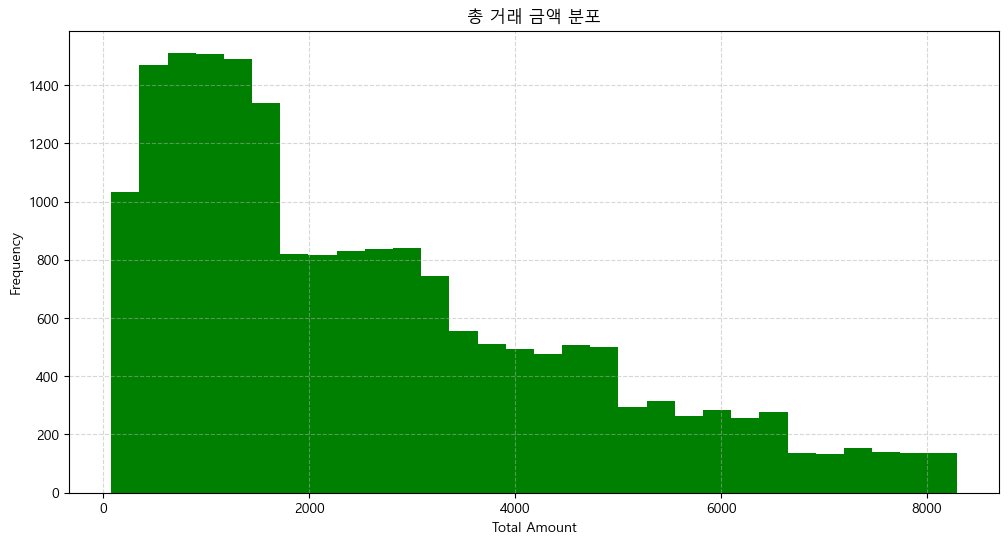

In [22]:
# 3. 매출 분포
plt.figure(figsize=(12, 6))
plt.hist(confirmed_df['total_amt'], bins=30, label='Total Amount', color='green')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.title('총 거래 금액 분포')
plt.grid(linestyle='--', alpha=0.5)
plt.savefig('./savefig/총거래금액_분포.png')

- 대부분 적은 매출이 발생하며, 일부 거래에서 높은 매출 발생
- 이는 특정 제품이 고가이거나 대량 구매에 따른 매출 증가 일 수 있음

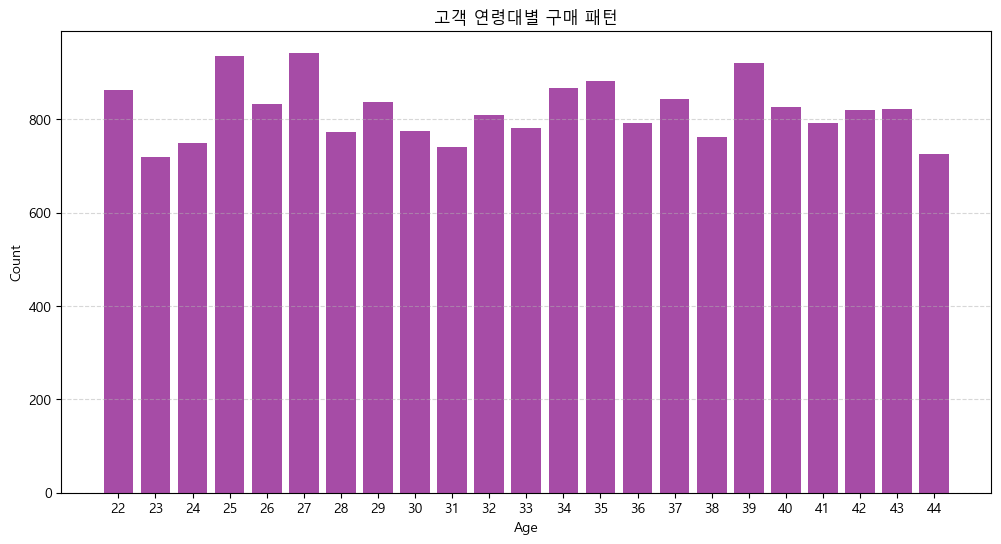

In [23]:
# 4. 고객 연령대별 구매 패턴
age_order = confirmed_df['Age'].value_counts().reset_index()
age_order = age_order.sort_values(by='Age', ignore_index=True)

plt.figure(figsize=(12, 6))
plt.bar(age_order['Age'], age_order['count'], alpha=0.7, color='purple')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(22,45,1))
plt.title('고객 연령대별 구매 패턴')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('./savefig/연령대별_구매패턴.png')

- 고객은 20대 초반에서 40대 초반으로 구성되어있음
- 큰 차이 없이 고른 분포를 보임

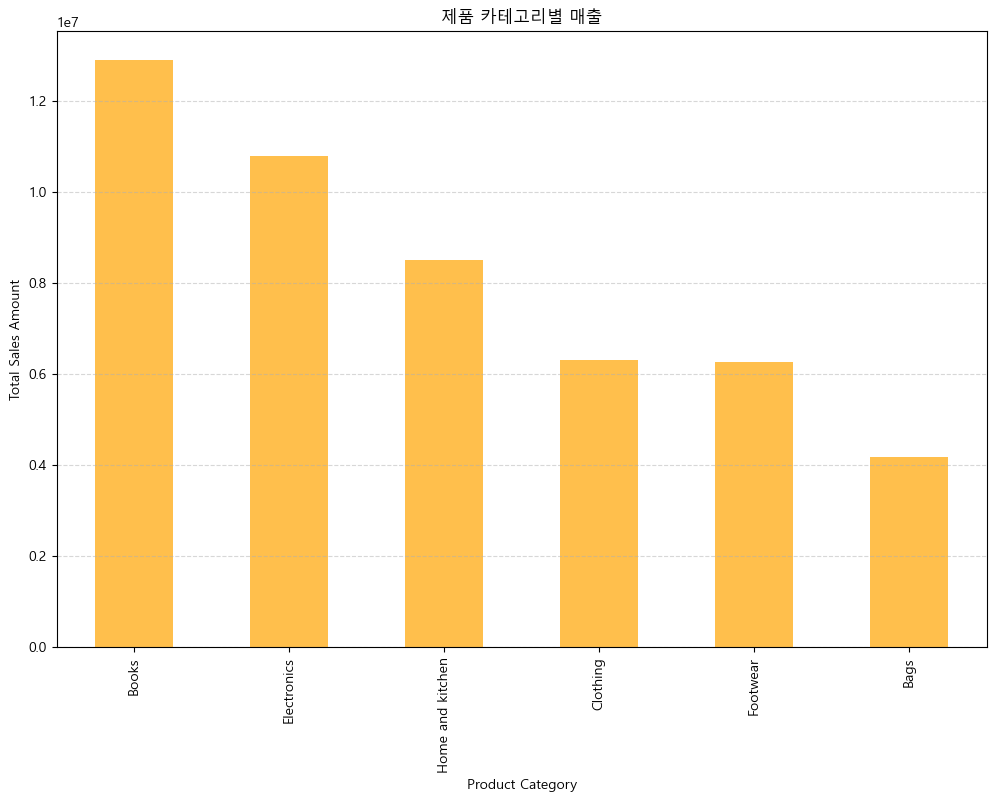

In [24]:
# 5. 제품 카테고리별 매출
prod_cat_sales = confirmed_df.groupby('prod_cat')['total_amt'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
prod_cat_sales.plot(kind='bar', alpha=0.7, color='orange')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.title('제품 카테고리별 매출')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('./savefig/제품카테고리별_매출.png')

- Books, Electronics, Home and Kitchen 카테고리에서 높은 매출을 기록함
- 마찬가지로 특정 제품이 고가이거나 대량 구매에 따른 매출 증가 일 수 있음

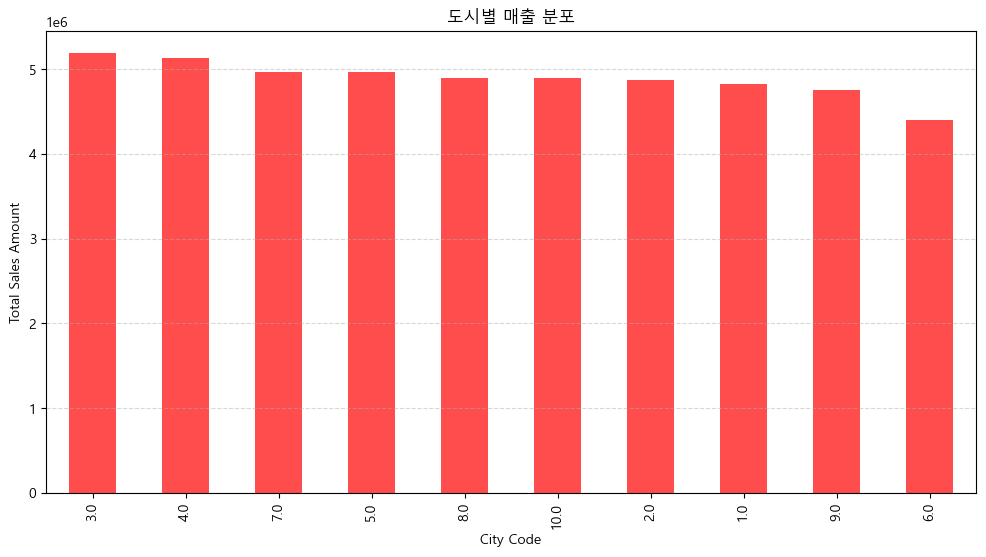

In [25]:
# 6. 도시별 매출 분포
city_sales = confirmed_df.groupby('city_code')['total_amt'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', alpha=0.7, color='red')
plt.xlabel('City Code')
plt.ylabel('Total Sales Amount')
plt.title('도시별 매출 분포')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('./savefig/도시별_매출분포.png')

- 지역 코드 3, 4와 같은 특정 도시에서 높은 매출을 기록하고 있음
- 지역 특화 마케팅을 통해 시장 점유율을 확대할 수 있음

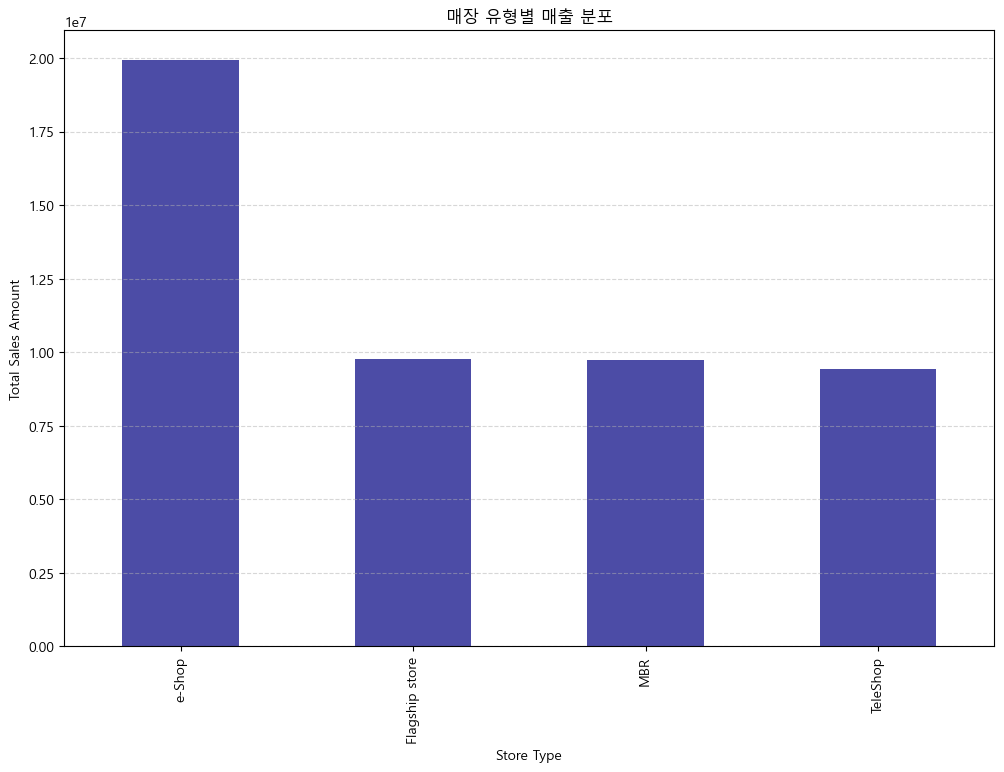

In [26]:
# 7. 매장 유형별 매출 분포
store_sales = confirmed_df.groupby('Store_type')['total_amt'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
store_sales.plot(kind='bar', alpha=0.7, color='navy')
plt.xlabel('Store Type')
plt.ylabel('Total Sales Amount')
plt.title('매장 유형별 매출 분포')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('./savefig/매장유형별_매출분포.png')

- e-Shop이 다른 매장과 비교했을 때 두 배 이상의 주문 수를 보임
- e-Shop에 대한 집중적인 마케팅 전략 수립이 필요하다고 판단됨

---

## 코호트(Cohort) 분석

- 2014년도는 주문이 불규칙하게 발생함
- 이슈 파악이 불가능하여 2013년도 데이터를 기준으로 코호트 분석함

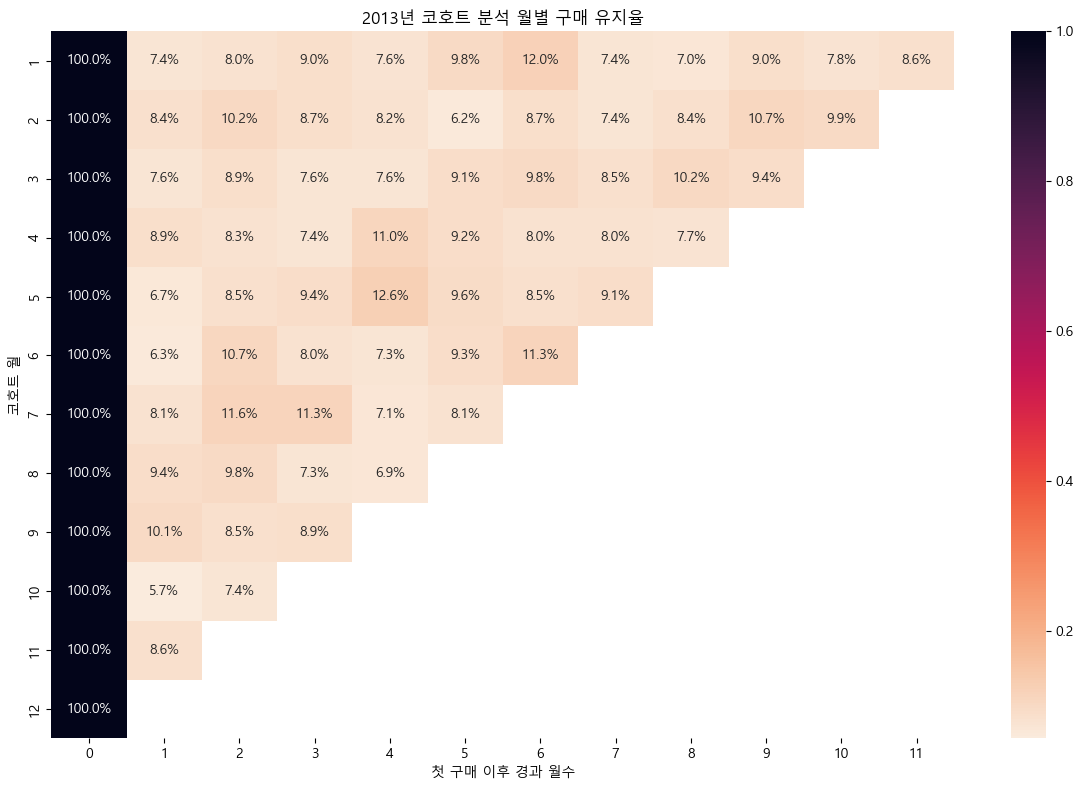

In [27]:
# 2013년 데이터 필터링
cohort = confirmed_df[confirmed_df['tran_date'].dt.year == 2013].copy()

# tran_date에서 월만 추출하기
cohort['month'] = cohort['tran_date'].dt.month

# 첫 구매일의 월별 코호트 생성
cohort['cohort'] = cohort.groupby('cust_id')['month'].transform('min')

# 첫 구매일 월부터 경과 월수 계산
cohort['since'] = cohort['month'] - cohort['cohort']

# 각 코호트 경과 월수에 해당하는 고객 수 계산
cohort_data = cohort.groupby(['cohort', 'since'])['cust_id'].nunique().reset_index()

# 피벗 테이블 생성
cohort_pivot = cohort_data.pivot(index='cohort', columns='since', values='cust_id')

# 코호트의 고객 수를 기준으로 유지율을 백분율로 계산
cohort_size = cohort_pivot.iloc[:, 0]
retention_rate = cohort_pivot.divide(cohort_size, axis=0)

# 코호트 분석 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_rate, 
    annot=True, 
    fmt=".1%", 
    cmap="rocket_r"
)
plt.title('2013년 코호트 분석 월별 구매 유지율')
plt.xlabel('첫 구매 이후 경과 월수')
plt.ylabel('코호트 월')
plt.tight_layout()
plt.savefig('./savefig/2013년_코호트분석.png')

#### 재구매 패턴 변화 분석
- 첫 구매 후 한 달이 지난 경우(M+1) 평균 재구매율은 8.0%로 나타남
- 첫 구매 후 6개월이 지난 경우(M+6) 평균 재구매율은 9.7%로 증가


초기에는 재구매율이 낮았으나 시간이 지남에 따라 고객의 재구매 패턴이 긍정적으로 변화<br>
제품이나 서비스에 대한 고객 만족도가 높아지거나, 효과적인 마케팅 전략의 결과일 수 있음<br><br>
따라서, 이러한 경향을 분석하여 장기적인 마케팅 전략을 수립하는데 활용하면 도움이 될 것임

#### M+1 구매 유지율 분석
- 9월: 10.1%로 최고치 기록
- 10월: 5.7%로 최저치 기록
- 11월: 8.6%로 어느 정도 회복

변동의 원인을 조사하고, 이러한 큰 변동이 다시 발생하지 않도록 예방해야 함<br><br>
현재의 마케팅 전략을 재평가하고 고객과의 소통으로 변동의 원인을 파악한 후, 실시간 데이터 모니터링으로 문제 발생 시 신속하게 대응할 수 있는 시스템을 마련하는 등의 조치가 필요함


---

## 퍼널(Funnel) 분석

- 전체 주문 고객 > 2013년도 주문 고객 > 2013년도 주문 확정 고객 > 2013년도 재구매 고객 퍼널 차트

In [28]:
# 2013년 데이터 필터링
funnel = merged_df[merged_df['tran_date'].dt.year == 2013].copy()

# 전체 주문 고객수
total_customer = len(customer)

# 2013년도 주문 고객수
order_customer = len(funnel['cust_id'].unique())

# 2013년도 주문 확정 고객수
confirmed_customer = len(funnel[funnel['Confirmed']==1]['cust_id'].unique())

# 2013년도 재구매 고객수
re_count = funnel[funnel['Confirmed']==1]['cust_id'].value_counts().reset_index()
re_customer = len(re_count[re_count['count'] > 1])

In [29]:
# 첫번째 퍼널 전환율
order_customer_ratio = round((order_customer / total_customer)*100, 1)

# 두번째 퍼널 전환율
confirmed_customer_ratio = round((confirmed_customer / order_customer)*100, 1)

# 세번째 퍼널 전환율
re_customer_ratio = round((re_customer / confirmed_customer)*100, 1)

In [30]:
# 데이터프레임 생성
data = [
    [total_customer, 0, 100, 0],
    [order_customer, total_customer-order_customer, order_customer_ratio, 100-order_customer_ratio],
    [confirmed_customer, order_customer-confirmed_customer, confirmed_customer_ratio, 100-confirmed_customer_ratio],
    [re_customer, confirmed_customer-re_customer, re_customer_ratio, 100-re_customer_ratio]
]

index = ['전체 주문 고객수', '2013 주문 고객수', '2013 주문 확정 고객수', '2013 재구매 고객수']
columns = ['전환', '이탈', '전환율(%)', '이탈률(%)']
funnel_df = pd.DataFrame(data, index=index, columns=columns)

funnel_df

,전환,이탈,전환율(%),이탈률(%)
전체 주문 고객수,5647,0,100.0,0.0
2013 주문 고객수,3952,1695,70.0,30.0
2013 주문 확정 고객수,3747,205,94.8,5.2
2013 재구매 고객수,1684,2063,44.9,55.1


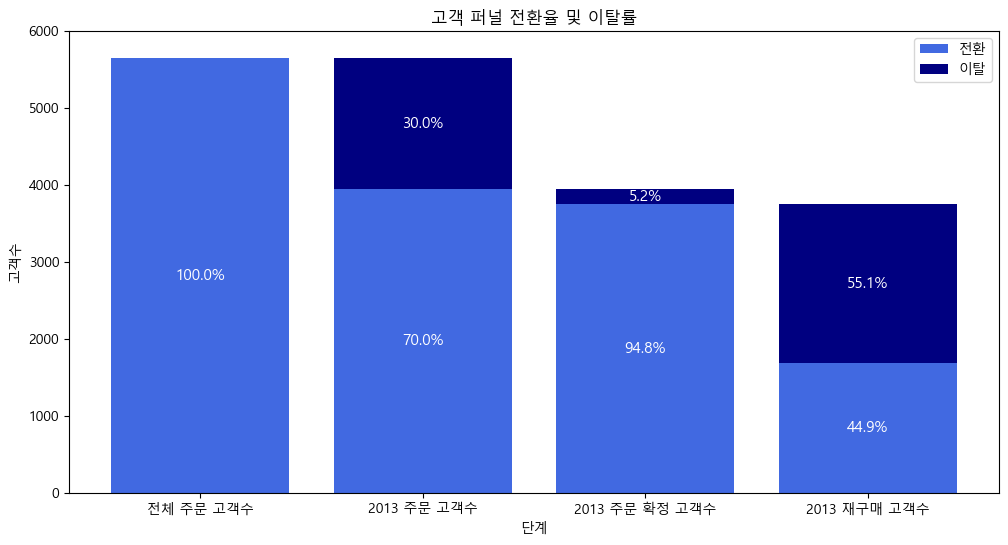

In [31]:
# 퍼널 차트 시각화
plt.figure(figsize=(12, 6))

bar_width = 0.8
x = range(len(funnel_df.index))
plt.bar(x, funnel_df['전환'], color='royalblue', width=bar_width, label='전환')
plt.bar(x, funnel_df['이탈'], bottom=funnel_df['전환'], color='navy', width=bar_width, label='이탈')

for i in x:
    plt.text(i, funnel_df.iloc[i,0] / 2, f"{round(funnel_df.iloc[i,2],1)}%", ha='center', va='center', color='white', fontsize=11)
    if funnel_df.iloc[i,1] > 0:
        plt.text(i, funnel_df.iloc[i,0] + funnel_df.iloc[i,1] / 2, f"{round(funnel_df.iloc[i,3],1)}%", ha='center', va='center', color='white', fontsize=11)

plt.xticks(x, funnel_df.index)
plt.ylim(0, 6000)
plt.xlabel('단계')
plt.ylabel('고객수')
plt.title('고객 퍼널 전환율 및 이탈률')
plt.legend()
plt.savefig('./savefig/고객퍼널_전환율및이탈률.png')

#### 첫 번째 퍼널: 전체 주문 고객수 > 2013 주문 고객수
- 전체 주문 고객수 중 70.0%에 해당하는 3,952명이 구매로 전환됨
- 2013년에 구매를 유도하는 마케팅 전략이 효과적으로 작용했다고 평가할 수 있음<br><br>

#### 두 번째 퍼널: 2013 주문 고객수 > 2013 주문 확정 고객수
- 94.8%의 높은 전환율을 기록했지만, 5.2%의 고객은 주문을 취소하고 있음
- 이탈 원인을 파악하고 주문 확정으로 전환을 유도하는 전략 필요<br><br>

#### 세 번째 퍼널: 2013 주문 확정 고객수 > 2013 재구매 고객수
- 두 번째 퍼널의 44.9%에 해당하는 1,684명이 재구매로 전환됨
- 고객 충성도가 일정 수준 유지되고 있지만, 절반 이상의 고객은 재구매로 이어지지 않고 있음
- 재구매율을 증가시키기 위해 제품 품질 향상이나 할인, 멤버십 등의 프로모션 도입 필요

---

## RFM 분석

- Recency : 가장 최근 거래 날짜
- Frequency : 각 고객의 2013년 누적 구매건수
- Monetary : 각 고객의 2013년 누적 구매금액

In [32]:
# 2013년 데이터 필터링
rfm = confirmed_df[confirmed_df['tran_date'].dt.year == 2013].copy()

# RFM 데이터프레임
rfm_df = rfm.groupby('cust_id').agg({'tran_date': lambda date: date.max(),
                                    'transaction_id': lambda num: len(num),
                                    'total_amt': lambda price: price.sum()})
rfm_df.columns=['recency', 'frequency', 'monetary']

rfm_df.head(3)

,recency,frequency,monetary
cust_id,,,
266783,2013-09-02,2,2805.595
266785,2013-02-13,2,2959.190
266788,2013-12-02,1,1312.740


- r_quartile : 가장 최근 거래 날짜가 2013년 12월이면 1(recent), 아니면 0(past)
- f_quartile : 상위 25% 이상이면 1(high), 아니면 0(low)
- m_quartile : 상위 25% 이상이면 1(high), 아니면 0(low)

In [33]:
# RFM class 나누기
bins = [pd.to_datetime('2012-12-31'), pd.to_datetime('2013-11-30'), pd.to_datetime('2013-12-31')]

rfm_df['r_quartile'] = pd.cut(rfm_df['recency'], bins=bins, labels=['0', '1'])
rfm_df['f_quartile'] = pd.qcut(rfm_df['frequency'], q=[0, 0.75, 1], labels=['0', '1'])
rfm_df['m_quartile'] = pd.qcut(rfm_df['monetary'], q=[0, 0.75, 1], labels=['0', '1'])

rfm_df.reset_index(inplace=True)
rfm_df.head(3)

,cust_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,266783,2013-09-02,2,2805.595,0,0,0
1,266785,2013-02-13,2,2959.190,0,0,0
2,266788,2013-12-02,1,1312.740,1,0,0


In [34]:
# RFM 스코어 정의
rfm_df['rfm_score'] = rfm_df['r_quartile'].astype(str) + rfm_df['f_quartile'].astype(str) + rfm_df['m_quartile'].astype(str)

# RFM 스코어가 같은 고객끼리 카운트
rfm_score = rfm_df['rfm_score'].value_counts().reset_index()

# 정렬 순서 정의
order = ['111', '011', '101', '001', '110', '010', '100', '000']

# 정렬 수행
rfm_score['rfm_score'] = pd.Categorical(rfm_score['rfm_score'], categories=order, ordered=True)
rfm_score = rfm_score.sort_values('rfm_score', ignore_index=True)

# 고객 등급 정의
rfm_score['rfm_grade'] = ['핵심 가치 고객', '핵심 충성 고객', '핵심 잠재 고객', '핵심 위험 고객', 
                          '일반 가치 고객', '일반 충성 고객', '일반 잠재 고객', '일반 위험 고객']

# 결과 확인
rfm_score

,rfm_score,count,rfm_grade
0,111,110,핵심 가치 고객
1,011,280,핵심 충성 고객
2,101,72,핵심 잠재 고객
3,001,474,핵심 위험 고객
4,110,34,일반 가치 고객
5,010,103,일반 충성 고객
6,100,284,일반 잠재 고객
7,000,2390,일반 위험 고객


#### Customer Segmentation 참고
- https://intl.finebi.com/blog/rfm-model

#### 고객 세분화 등급에 따른 액션 제안
1. 핵심 가치 고객(111)
- 가장 가치가 있는 고객으로, 구매 빈도가 높으며 금전적 가치가 높은 고객
- 관계를 지속적으로 유지하기 위해 특별한 혜택과 맞춤형 마케팅 전략 필요

2. 핵심 충성 고객(011)
- 과거 구매 빈도가 높고 많은 금액을 구매했지만 최근에 구매한 적 없는 고객
- 고객의 피드백을 통해 요구 사항 변화를 이해하고 마케팅 전략 수립이 필요

3. 핵심 잠재 고객(101)
- 최근에 많은 금액을 구매했지만 자주 구매하지는 않는 고객
- 마케팅 전략을 통해 구매 동기를 부여하여 빈도를 늘리고 핵심 가치 고객으로 전환시켜야 함

4. 핵심 위험 고객(001)
- 많은 금액을 썼지만 구매 빈도가 낮고 최근에 구매한 적 없는 고객
- 구매 주기가 긴 제품을 구매했을 가능성도 있음
- 오랫동안 구매를 하지 않은 이유를 파악한 다음 개인 맞춤형 마케팅으로 재구매 유도 필요

5. 일반 가치 고객(110)
- 최근에 자주 구매했지만 적은 금액을 구매한 고객
- 잠재적인 금전적 가치는 적지만 매우 활동적이고 충성도가 높음
- 회사를 홍보하고 평판을 확대하는 데 사용할 수 있음

6. 일반 충성 고객(010)
- 구매 빈도는 비교적 높지만 소비량이 낮고 최근에 구매하지 않은 고객
- 어느 정도 충성도는 있지만 최근 요구 사항이 바뀌었을 수 있음
- 마찬가지로 피드백을 통해 요구 사항 변화를 이해하고 마케팅 전략 수립 필요

7. 일반 잠재 고객(100)
- 첫 구매를 시도한 고객이며 아직 브랜드 인지 단계에 있음
- 자주 방문할 수 있도록 출석체크 이벤트나 포인트 제도 도입을 고려

8. 일반 위험 고객(000)
- 구매 활동이 거의 없는 고객
- 추가적인 마케팅 비용을 지출하기 보다는 브랜드 인지도를 높이는 방식으로 접근

---

## 고객 생애 가치(LTV) 계산

LTV = 총 매출 * 구매 횟수 * 고객 생애 기간
- 총 매출 : 각 고객의 총 구매 금액
- 구매 횟수 : 각 고객의 총 구매 횟수
- 고객 생애 기간 : 고객이 서비스를 이용한 기간(단위:년)

In [35]:
# 총 구매 금액
customer_revenue = confirmed_df.groupby('cust_id')['total_amt'].sum()

# 구매 횟수
purchase_frequency = confirmed_df.groupby('cust_id')['transaction_id'].nunique()

# 첫 구매 날짜와 마지막 구매 날짜
first_purchase_date = confirmed_df.groupby('cust_id')['tran_date'].min()
last_purchase_date = confirmed_df.groupby('cust_id')['tran_date'].max()

# 고객 생애 기간
customer_lifespan = (last_purchase_date - first_purchase_date).dt.days / 365

# LTV 계산
ltv_per_customer = round(customer_revenue * purchase_frequency * customer_lifespan, 1)

# 데이터프레임 생성
ltv_df = pd.DataFrame({
    'Total Revenue': customer_revenue,
    'Purchase Frequency': purchase_frequency,
    'Customer Lifespan': customer_lifespan,
    'LTV': ltv_per_customer
}).reset_index()

# LTV 데이터프레임을 확인합니다.
ltv_df.head()

,cust_id,Total Revenue,Purchase Frequency,Customer Lifespan,LTV
0,266783,3113.890,3,0.865753,8087.6
1,266784,5694.065,3,0.410959,7020.1
2,266785,21613.800,6,1.920548,249062.0
3,266788,6092.970,4,2.221918,54152.3
4,266794,27981.915,10,3.712329,1038780.7


- 고객별 LTV 분석을 통해 개인화된 맞춤형 마케팅 전략을 수립 가능

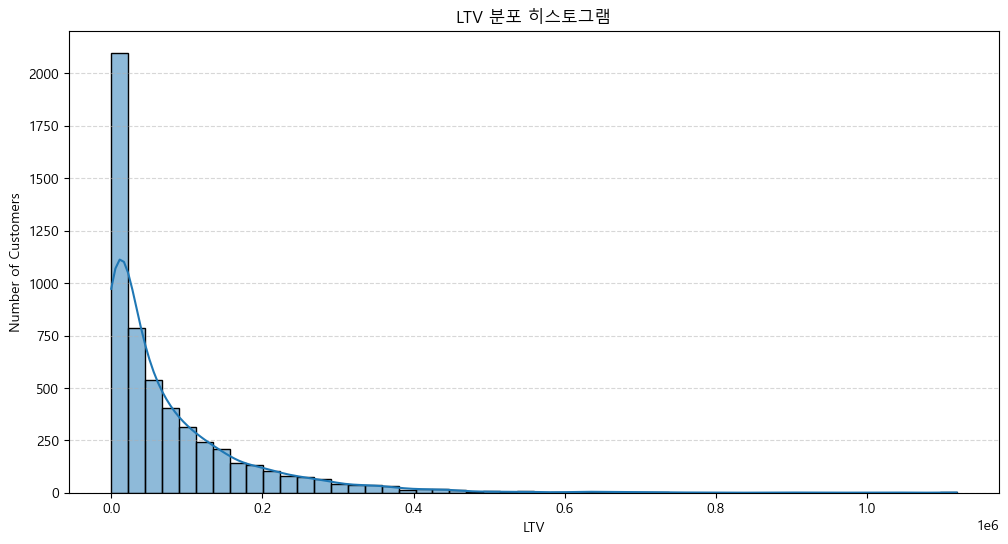

In [36]:
# 1. LTV 분포 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(ltv_df['LTV'], bins=50, kde=True)
plt.title('LTV 분포 히스토그램')
plt.xlabel('LTV')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('./savefig/LTV_분포_히스토그램.png')

- 대부분이 중간 이하 수준의 LTV를 가짐
- 일부 고객이 매우 높은 LTV를 보임

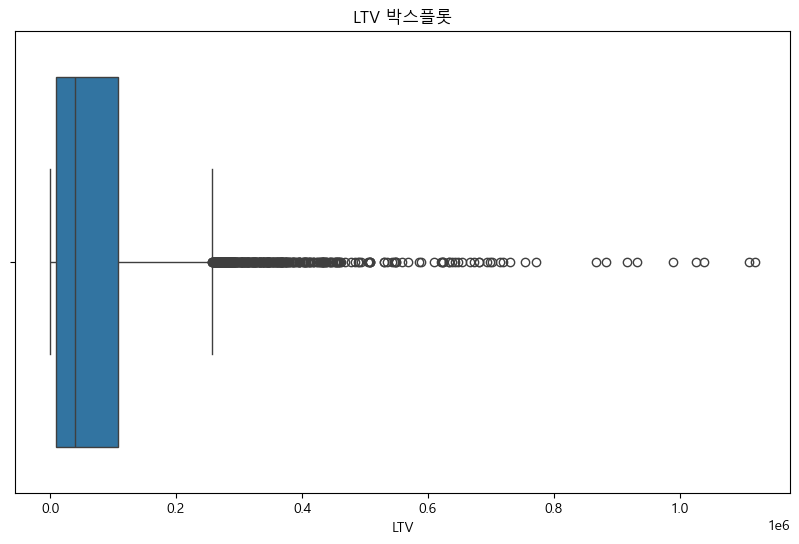

In [37]:
# 2. LTV 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x=ltv_df['LTV'])
plt.title('LTV 박스플롯')
plt.xlabel('LTV')
plt.savefig('./savefig/LTV_박스플롯.png')

- 이상치로 보이는 데이터는 높은 LTV를 가지는 일부 고객이므로 특별히 관리해야 함

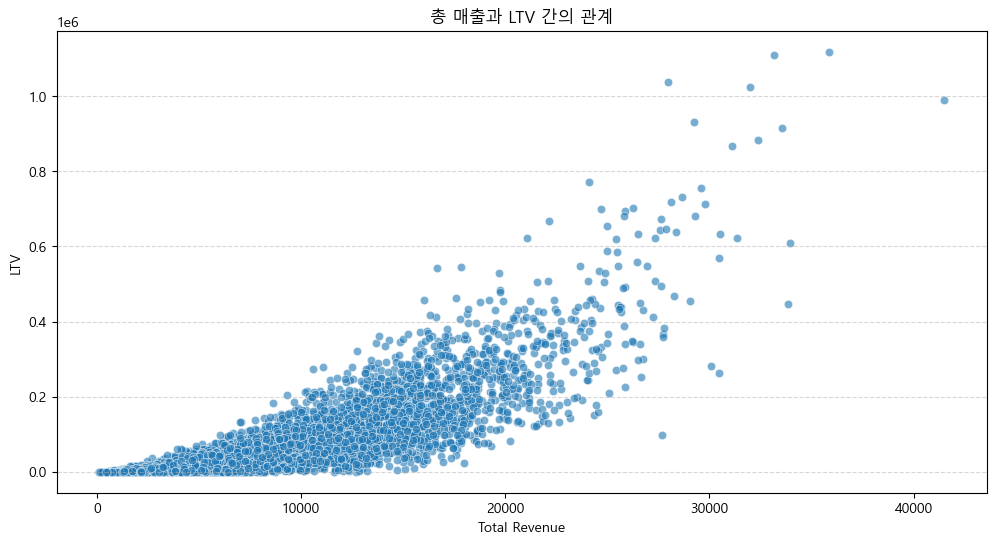

In [38]:
# 3. 총 매출과 LTV 간의 관계
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total Revenue', y='LTV', data=ltv_df, alpha=0.6)
plt.title('총 매출과 LTV 간의 관계')
plt.xlabel('Total Revenue')
plt.ylabel('LTV')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('./savefig/총매출_LTV_관계.png')

- 총 매출이 높을수록 LTV가 높으며, 높은 총 매출을 기록하는 고객에게 집중하여 전략 수립

In [39]:
# RFM 데이터프레임과 LTV 데이터프레임 조인
rfm_ltv = pd.merge(
    rfm_df,
    ltv_df,
    left_on='cust_id',
    right_on='cust_id',
    how='left'
)

rfm_ltv.head(3)

,cust_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,Total Revenue,Purchase Frequency,Customer Lifespan,LTV
0,266783,2013-09-02,2,2805.595,0,0,0,000,3113.89,3,0.865753,8087.6
1,266785,2013-02-13,2,2959.190,0,0,0,000,21613.80,6,1.920548,249062.0
2,266788,2013-12-02,1,1312.740,1,0,0,100,6092.97,4,2.221918,54152.3


In [40]:
# RFM 점수별로 고객 수와 LTV 합계 계산
rfm_agg = rfm_ltv.groupby('rfm_score').agg(
    count=('rfm_score', 'count'),
    ltv_average=('LTV', lambda x: round(x.mean(), 1))
).reset_index()

# 정렬 순서 정의
order = ['111', '011', '101', '001', '110', '010', '100', '000']

# 정렬 수행
rfm_agg['rfm_score'] = pd.Categorical(rfm_agg['rfm_score'], categories=order, ordered=True)
rfm_agg = rfm_agg.sort_values('rfm_score', ignore_index=True)

# 고객 등급 정의
rfm_agg['rfm_grade'] = ['핵심 가치 고객', '핵심 충성 고객', '핵심 잠재 고객', '핵심 위험 고객', 
                        '일반 가치 고객', '일반 충성 고객', '일반 잠재 고객', '일반 위험 고객']
rfm_agg

,rfm_score,count,ltv_average,rfm_grade
0,111,110,246928.1,핵심 가치 고객
1,011,280,204581.9,핵심 충성 고객
2,101,72,111119.3,핵심 잠재 고객
3,001,474,126810.6,핵심 위험 고객
4,110,34,151405.5,일반 가치 고객
5,010,103,101081.0,일반 충성 고객
6,100,284,95905.3,일반 잠재 고객
7,000,2390,75474.8,일반 위험 고객


In [41]:
# 전체 고객 수 계산
total_count = rfm_agg['count'].sum()

# 각 RFM 그룹에 대한 백분율 계산
rfm_agg['percentage'] = (rfm_agg['count'] / total_count) * 100

rfm_agg

,rfm_score,count,ltv_average,rfm_grade,percentage
0,111,110,246928.1,핵심 가치 고객,2.935682
1,011,280,204581.9,핵심 충성 고객,7.472645
2,101,72,111119.3,핵심 잠재 고객,1.921537
3,001,474,126810.6,핵심 위험 고객,12.650120
4,110,34,151405.5,일반 가치 고객,0.907393
5,010,103,101081.0,일반 충성 고객,2.748866
6,100,284,95905.3,일반 잠재 고객,7.579397
7,000,2390,75474.8,일반 위험 고객,63.784361


In [42]:
rfm_agg.to_csv('rfm_df.csv', encoding='euc-kr', index=False)

#### LTV 계산을 통한 마케팅 우선순위 지정
1. 고객 그룹 우선순위
- 핵심 가치 고객 (111): 이 그룹은 가장 높은 LTV를 가진 고객으로, 매출에 큰 기여를 하고 있음
- 핵심 충성 고객 (011): 최근 구매는 없지만 충성도가 높은 고객으로, 관심을 기울여 관계 회복 필요
- 일반 가치 고객 (110): 활동적이고 충성도가 높은 고객으로, 회사 평판을 확대하고 홍보하는 데 중요한 역할을 할 수 있음

2. 매출 증가 가능성
- 이 그룹들은 추가 구매나 고가의 제품을 선택할 가능성이 높음
- 업셀링 및 크로스셀링 전략을 통해 매출을 극대화할 수 있음
- 이들은 다른 잠재 고객에게 긍정적인 추천을 제공할 가능성도 큼

3. 마케팅 전략 제안
- 핵심 가치 고객: 맞춤형 혜택과 멤버십 프로그램을 제공하여 충성도 강화
- 핵심 충성 고객: 리마인더 이메일, 프로모션 등의 재참여 캠페인을 실행
- 일반 가치 고객: 적극적으로 관리하여 회사를 홍보와 영향력 확보에 활용